## Predictive modeling of customer bookings British Airways


In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor


In [4]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [8]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [9]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=["booking_complete"])
y = df["booking_complete"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.52      0.14      0.22      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.56      0.57     10000
weighted avg       0.82      0.85      0.82     10000



In [ ]:
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose().round(2)
report_df

,precision,recall,f1-score,support
0,0.87,0.98,0.92,8520.00
1,0.52,0.14,0.22,1480.00
accuracy,0.85,0.85,0.85,0.85
macro avg,0.69,0.56,0.57,10000.00
weighted avg,0.82,0.85,0.82,10000.00


## Random Forest Model Summary

A Random Forest Classifier was trained to predict whether a customer booking would be completed (`booking_complete`). The model used all available features, with categorical variables converted to dummy variables. The dataset was split into training and test sets (80/20 split).

### Model Training Steps

- **Feature Selection:** All columns except the target (`booking_complete`) were used as features.
- **Encoding:** Categorical variables were one-hot encoded.
- **Splitting:** Data was split into training and test sets.
- **Model:** RandomForestClassifier with `random_state=42` for reproducibility.
- **Evaluation:** Predictions were made on the test set, and a classification report was generated.

### Classification Report

The classification report provides the following metrics for each class:

- **Precision:** Proportion of positive identifications that were actually correct.
- **Recall:** Proportion of actual positives that were identified correctly.
- **F1-score:** Harmonic mean of precision and recall.
- **Support:** Number of occurrences of each class in the test set.

This report helps assess the model's ability to correctly classify completed and non-completed bookings, highlighting strengths and weaknesses in prediction performance. The Random Forest model also allows for feature importance analysis, helping to identify which variables contribute most to predicting booking completion.

In [14]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print(mi_series.head(20))

booking_origin_Australia    0.026543
booking_origin_Malaysia     0.021830
flight_duration             0.015515
length_of_stay              0.009753
trip_type_RoundTrip         0.009703
wants_extra_baggage         0.006420
booking_origin_Denmark      0.005207
wants_in_flight_meals       0.004841
purchase_lead               0.004483
route_KBRPEK                0.004459
wants_preferred_seat        0.004408
route_MELPNH                0.004389
route_PERPNH                0.004217
route_CGKKIX                0.004025
route_ICNJHB                0.003973
route_OOLPNH                0.003909
route_MRUPEN                0.003877
route_DELSZX                0.003832
route_COKSYD                0.003767
route_PUSSGN                0.003699
dtype: float64


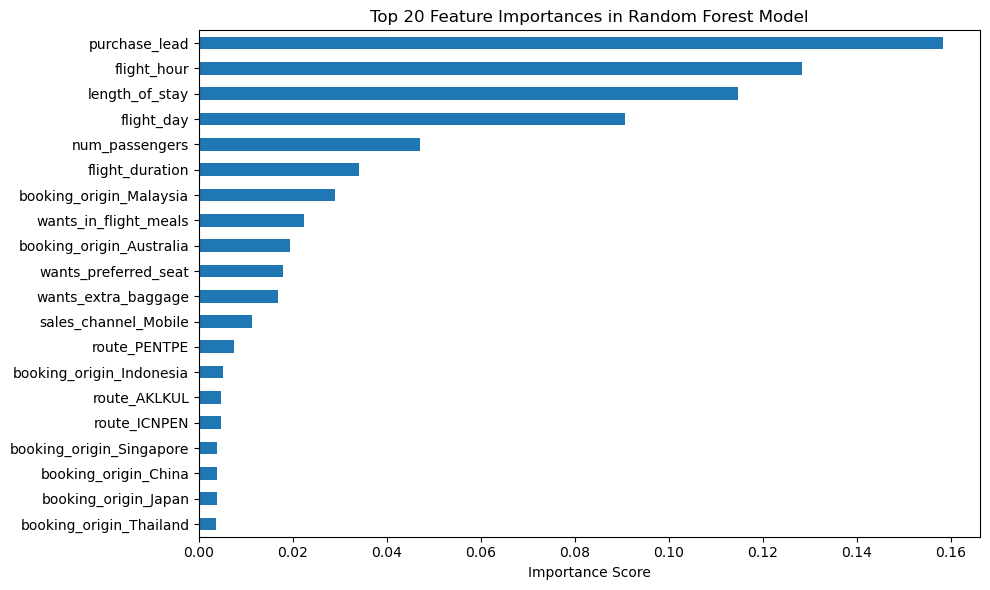

In [ ]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot the top 20 features
top_n = 20
plt.figure(figsize=(10, 6))
feat_imp.head(top_n).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 20 Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

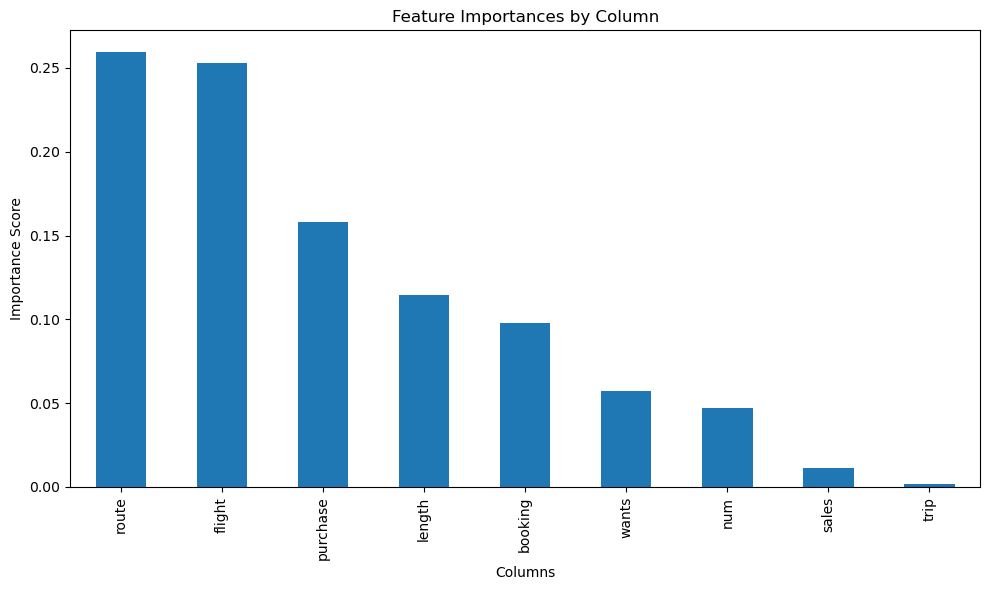

In [32]:
import matplotlib.pyplot as plt

# Aggregate feature importances by original column name
column_importance = {}
for col in X.columns:
	# Get the original column name before dummy encoding
	orig_col = col.split('_')[0] if '_' in col else col
	column_importance[orig_col] = column_importance.get(orig_col, 0) + feat_imp[col]

# Convert to Series for plotting
col_imp_series = pd.Series(column_importance).sort_values(ascending=False)

# Plot aggregated importances by column
plt.figure(figsize=(10, 6))
col_imp_series.plot(kind='bar')
plt.title('Feature Importances by Column')
plt.ylabel('Importance Score')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

## Project Summary


### Workflow Summary

1. **Exploratory Data Analysis:**  
    - Inspected the first few rows and data types.
    - Checked for missing values and performed necessary data type conversions (e.g., mapping days of the week to numbers).

2. **Feature Engineering:**  
    - Converted categorical variables to dummy/indicator variables for modeling.
    - Ensured all features were in a suitable format for machine learning algorithms.

3. **Model Training:**  
    - Split the data into training and test sets (80/20 split).
    - Trained a Random Forest Classifier to predict booking completion.
    - Evaluated the model using a classification report, providing precision, recall, F1-score, and support for each class.

4. **Feature Importance Analysis:**  
    - Used mutual information and Random Forest feature importances to identify the most influential features.
    - Visualized both individual dummy variable importances and aggregated importances by original column.

### Key Insights

- The model achieved reasonable performance in predicting booking completion, as shown by the classification report.
- Feature importance analysis highlighted which variables most strongly influenced booking outcomes, providing actionable insights for business strategy and further analysis.
